# Algorithmique et complexité

La [complexité](), dans le cadre du calcul numérique, étudie les difficultés de mise en oeuvre des algorithmes. Il s'agit par exemple d'étudier le temps de calcul avant convergence, la quantité de mémoire nécessaire à l'éxécution d'un algorithme, ... 

On va étudier ici la compléxité à l'aide de quelques algorithmes de tri. Ceux-ci sont particulièrement important pour le traitement des données. On se limite au cas du tri d'un tableau à une dimension d'entier. Cela simplifie surtout les exemples, sans réellement changer les algorithmes : il suffit d'implémenter une fonction spéciale d'ordre (par exemple `__lt__` pour surcharger la méthode `<` entre deux objets) pour obtenir le tri de n'importe quel objet en Python.

In [1]:
from datetime import datetime as dt
from random import randint

from matplotlib import pyplot as plt

a = [randint(0,100) for _ in range(10)]
a

[47, 34, 27, 9, 57, 23, 9, 51, 82, 46]

## Selection sort

https://en.wikipedia.org/wiki/Selection_sort

Permute l'élément en cours avec le minimum des restants dans la suite. 

In [3]:
def selection_sort(A):
    """https://en.wikipedia.org/wiki/Selection_sort"""
    for i in range(len(A)):
        min_idx = i
        for j in range(i+1, len(A)):
            if A[j] < A[min_idx]:
                min_idx = j
        A[i], A[min_idx] = A[min_idx], A[i]
    return A

selection_sort(a)

[9, 9, 23, 27, 34, 46, 47, 51, 57, 82]

Performe le tri dans la même liste (on parle de construction _in-place_).

In [4]:
a

[9, 9, 23, 27, 34, 46, 47, 51, 57, 82]

Pour ne pas modifier la liste originale (mais est-ce vraiment un besoin ?), il faut construire une copie (évidemment on stocke maintenant deux objets en tout ... )

In [5]:
a = [randint(0,100) for _ in range(10)]
print(a)
a_ = selection_sort(a.copy())
print(a)
print(a_)

[23, 3, 65, 90, 94, 20, 68, 78, 31, 92]
[23, 3, 65, 90, 94, 20, 68, 78, 31, 92]
[3, 20, 23, 31, 65, 68, 78, 90, 92, 94]


On peut donc compter le nombre de lecture d'éléments, le nombre de comparaison (pour la recherche du minimum) et le nombre de permutations. On peut également calculer le temps d'éxécution en fonction de la taille du tableau à trier. 

In [2]:
def selection_sort_count(A):
    """https://en.wikipedia.org/wiki/Selection_sort"""
    nb_readings = 0
    nb_comparisons = 0
    nb_permutations = 0
    for i in range(len(A)):
        min_idx = i
        for j in range(i+1, len(A)):
            nb_readings += 2 # two elements read
            nb_comparisons += 1
            if A[j] < A[min_idx]:
                min_idx = j
        A[i], A[min_idx] = A[min_idx], A[i]
        nb_permutations += 1
    counts = (nb_readings, 
              nb_comparisons, 
              nb_permutations)
    return A, counts

In [10]:
counts, times, sizes = [], [], []
for size in range(1,1001,25):
    a = [randint(0,100) for _ in range(size)]
    t = dt.now()
    a_, count_ = selection_sort_count(a)
    t_ = dt.now()-t
    times.append(t_.total_seconds())
    counts.append(count_)
    sizes.append(size)

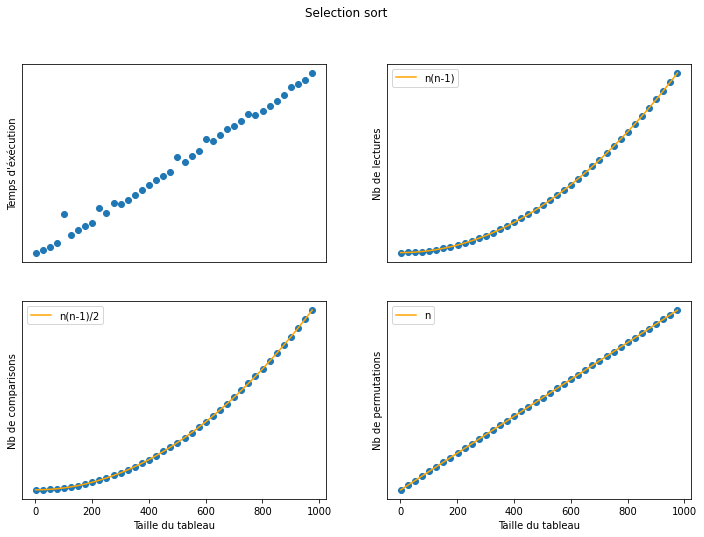

<Figure size 432x288 with 0 Axes>

In [62]:
fig, axes = plt.subplots(2,2, figsize=(12,8))

fig.suptitle("Selection sort")

ax = axes[0,0]
ax.scatter(sizes, times)
ax.set_ylabel("Temps d'éxécution")
ax.set_yticks([])
ax.set_xticks([])

ax = axes[0,1]
ax.scatter(sizes, [c[0] for c in counts])
ax.set_ylabel("Nb de lectures")
ax.set_yticks([])
ax.set_xticks([])
ax.plot(sizes, [s*(s-1) for s in sizes],
        color='orange', label="n(n-1)")
ax.legend()


ax = axes[1,0]
ax.scatter(sizes, [c[1] for c in counts])
ax.set_ylabel("Nb de comparisons")
ax.set_xlabel('Taille du tableau')
ax.set_yticks([])
ax.plot(sizes, [s*(s-1)/2 for s in sizes],
        color='orange',label='n(n-1)/2')
ax.legend()

ax = axes[1,1]
ax.set_ylabel("Nb de permutations")
ax.set_xlabel('Taille du tableau')
ax.set_yticks([])
ax.scatter(sizes, [c[2] for c in counts])
ax.plot(sizes, sizes, 
       color='orange', label='n')
ax.legend()

plt.show(fig)
plt.clf()

L'algorithme est quadratique (depuis le temps d'éxécution), et il procède d'un nombre linéaire de manipulation de la liste (depuis le nombre de permutations). 

## Insertion sort

https://en.wikipedia.org/wiki/Insertion_sort

In [47]:
def insertion_sort(A):
    """
    https://en.wikipedia.org/wiki/Insertion_sort
    """
    for i in range(1,len(A)):
        for j in range(i,0,-1):
            if A[j] < A[j-1]:
                A[j], A[j-1] = A[j-1], A[j]
    return A

a = [randint(0,100) for _ in range(10)]
print(a)
insertion_sort(a)
print(a)

[73, 4, 3, 4, 45, 43, 74, 73, 64, 12]
[3, 4, 4, 12, 43, 45, 64, 73, 73, 74]


Algorithme quadratique également.

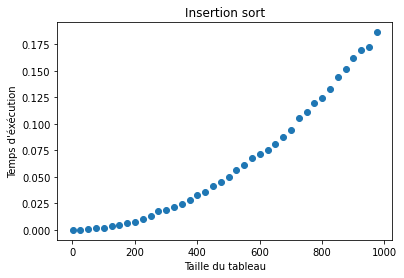

<Figure size 432x288 with 0 Axes>

In [51]:
times, sizes = [], []
for size in range(1,1001,25):
    a = [randint(0,100) for _ in range(size)]
    t = dt.now()
    a_ = insertion_sort(a)
    t_ = dt.now()-t
    times.append(t_.total_seconds())
    sizes.append(size)

fig, ax = plt.subplots()

ax.scatter(sizes, times)
ax.set_ylabel("Temps d'éxécution")
ax.set_xlabel('Taille du tableau')
ax.set_title("Insertion sort")

plt.show(fig)
plt.clf()

## Bubble sort

 https://en.wikipedia.org/wiki/Bubble_sort

In [54]:
def bubble_sort(A):
    """https://en.wikipedia.org/wiki/Bubble_sort"""
    n = len(A)
    for i in range(n):
        for j in range(0, n-i-1):
            if A[j+1] < A[j]:
                A[j], A[j+1] = A[j+1], A[j]
    return A

a = [randint(0,100) for _ in range(10)]
print(a)
bubble_sort(a)
print(a)

[27, 9, 12, 98, 73, 86, 8, 71, 29, 80]
[8, 9, 12, 27, 29, 71, 73, 80, 86, 98]


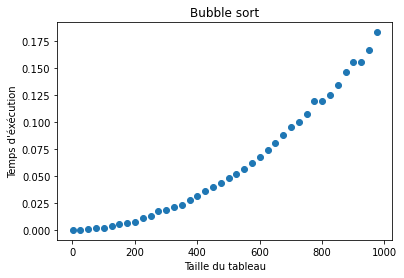

<Figure size 432x288 with 0 Axes>

In [52]:
times, sizes = [], []
for size in range(1,1001,25):
    a = [randint(0,100) for _ in range(size)]
    t = dt.now()
    a_ = bubble_sort(a)
    t_ = dt.now()-t
    times.append(t_.total_seconds())
    sizes.append(size)

fig, ax = plt.subplots()

ax.scatter(sizes, times)
ax.set_ylabel("Temps d'éxécution")
ax.set_xlabel('Taille du tableau')
ax.set_title("Bubble sort")

plt.show(fig)
plt.clf()

## Quick sort

https://en.wikipedia.org/wiki/Quicksort

On partitionne le tableau initial à l'aide d'un pivot (souvent le dernier élément du tableau) que l'on vient placer de sorte que tous les éléments à gauche soient plus petits (mais pas forcément triés) et tous les éléments à droite soient plus grands que le pivot. Puis on progresse par récurence, technique de programmation qui consiste à découper le problème complexe en une succession de petits problèmes simples, la technique du [_divide and conquer_](https://fr.wikipedia.org/wiki/Diviser_pour_r%C3%A9gner_(informatique)).

In [55]:
def quick_sort(A, low=0, high=None):
    """https://en.wikipedia.org/wiki/Quicksort"""
    
    def partition(A, low, high):
        pivot = A[high]
        i = low - 1
        for j in range(low, high):
            if A[j] < pivot:
                i = i + 1
                A[i], A[j] = A[j], A[i]
        A[i + 1], A[high] = A[high], A[i + 1]
        return i + 1
    
    if high is None:
        high = len(A)-1
    if low < high:
        pivot = partition(A, low=low, high=high)
        quick_sort(A, low=low, high=pivot - 1)
        quick_sort(A, low=pivot + 1, high=high)
    return A

a = [randint(0,100) for _ in range(10)]
print(a)
quick_sort(a)
print(a)

[10, 76, 94, 23, 10, 12, 78, 20, 5, 56]
[5, 10, 10, 12, 20, 23, 56, 76, 78, 94]


Quick sort est presque linéaire (il est en fait en $n\log n$), et très rapide. En revanche, il n'est pas [stable](https://en.wikipedia.org/wiki/Sorting_algorithm#Stability) (les éléments de même valeur peuvent être permutés dans le tableau final).

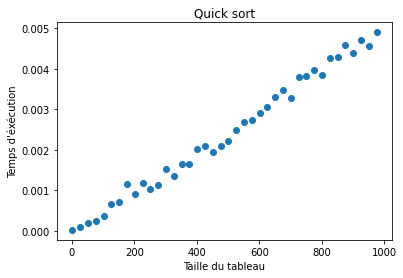

<Figure size 432x288 with 0 Axes>

In [56]:
times, sizes = [], []
for size in range(1,1001,25):
    a = [randint(0,100) for _ in range(size)]
    t = dt.now()
    a_ = quick_sort(a)
    t_ = dt.now()-t
    times.append(t_.total_seconds())
    sizes.append(size)

fig, ax = plt.subplots()

ax.scatter(sizes, times)
ax.set_ylabel("Temps d'éxécution")
ax.set_xlabel('Taille du tableau')
ax.set_title("Quick sort")

plt.show(fig)
plt.clf()

## Merge sort

https://fr.wikipedia.org/wiki/Tri_fusion

Procède par récurence, en découpant la liste principale en sous-liste de taille médiane. Une fos des tableaux d'au plus deux valeurs sont obtenus, on procède au tri de ces sous-listes (c'est juste une comparaison d'éléments deux-à-deux), et on recombine les sous-listes; La puissance de l'algorithme vient du fait que l'on sait recombiner deux listes ordonnées dans une liste ordonnée unique en un temps linéaire.

In [57]:
def merge_sort(A):
    """https://www.geeksforgeeks.org/merge-sort/"""
    if len(A) > 1:
        # Splitting the problem in sub-problems 
        mid = len(A)//2
        L, R = A[:mid], A[mid:]
        merge_sort(L)
        merge_sort(R)
        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                A[k] = L[i]
                i += 1
            else:
                A[k] = R[j]
                j += 1
            k += 1
  
        # Checking if any element was left
        while i < len(L):
            A[k] = L[i]
            i += 1
            k += 1
  
        while j < len(R):
            A[k] = R[j]
            j += 1
            k += 1
    return A

a = [randint(0,100) for _ in range(10)]
print(a)
merge_sort(a)
print(a)

Et de fait, l'algorithme est quasiment linéaire en temps (il est en fait en $n\log n$, où $n$ est la taille de la liste à trier).

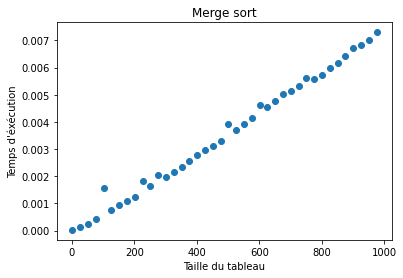

<Figure size 432x288 with 0 Axes>

In [59]:
times, sizes = [], []
for size in range(1,1001,25):
    a = [randint(0,100) for _ in range(size)]
    t = dt.now()
    a_ = merge_sort(a)
    t_ = dt.now()-t
    times.append(t_.total_seconds())
    sizes.append(size)

fig, ax = plt.subplots()

ax.scatter(sizes, times)
ax.set_ylabel("Temps d'éxécution")
ax.set_xlabel('Taille du tableau')
ax.set_title("Merge sort")

plt.show(fig)
plt.clf()